<a href="https://colab.research.google.com/github/sreehari59/Polar-Embedding/blob/main/Hofstede_single_cell_execution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
avgrank_random_list=[]
avgrank_nearest_random_list=[]
avgrank_human_list=[]
avgrank_nearest_human_list=[]

avgscore_random_list = []
avgscore_nearest_random_list = []
avgscore_human_list = []
avgscore_nearest_human_list = []

In [36]:
def list_avg(avg_list):
  sum = 0
  for i in avg_list:
    sum = sum + i
  return sum/len(avg_list)

Please choose any of the Hofstede dimension
1. Power Distance
2. Individualism vs Collectivism
3. Masculinity vs Femininity
4. Long Term vs Short Term Orientation
5. Indulgence vs Restraint
6. Uncertainty Avoidance

Enter the Hofstede Dimension: Uncertainty Avoidance


,Mean Absolute Error of Rank,Correlation,Mean Absolute Error of Score
Random List,2.285714,0.250000,2.285714
Nearest Random List,2.857143,-0.392857,2.857143
Human Made List,2.571429,-0.107143,2.571429
Nearest to Human Made List,1.428571,0.607143,1.428571


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:377: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,Total Count,Total Score Random,Polar Rank R,Total Score Nearest Random,Polar Rank Nearest R,Total Score Human,Polar Rank H,Total Score Nearest Human,Polar Rank Nearest H,Uncertainty avoidance Ranking
Total Count,1.00,0.26,-0.16,0.01,-0.55,-0.14,-0.16,0.47,0.68,0.29
Total Score Random,0.26,1.00,-0.94,0.40,0.27,0.16,0.86,-0.22,-0.39,-0.17
Polar Rank R,-0.16,-0.94,1.00,-0.64,-0.36,-0.35,-0.82,0.40,0.36,0.25
Total Score Nearest Random,0.01,0.40,-0.64,1.00,-0.01,0.59,0.24,-0.53,0.04,-0.16
Polar Rank Nearest R,-0.55,0.27,-0.36,-0.01,1.00,0.34,0.64,-0.28,-0.71,-0.39
Total Score Human,-0.14,0.16,-0.35,0.59,0.34,1.00,0.31,0.10,-0.04,0.09
Polar Rank H,-0.16,0.86,-0.82,0.24,0.64,0.31,1.00,-0.22,-0.64,-0.11
Total Score Nearest Human,0.47,-0.22,0.40,-0.53,-0.28,0.10,-0.22,1.00,0.41,0.52
Polar Rank Nearest H,0.68,-0.39,0.36,0.04,-0.71,-0.04,-0.64,0.41,1.00,0.61
Uncertainty avoidance Ranking,0.29,-0.17,0.25,-0.16,-0.39,0.09,-0.11,0.52,0.61,1.00


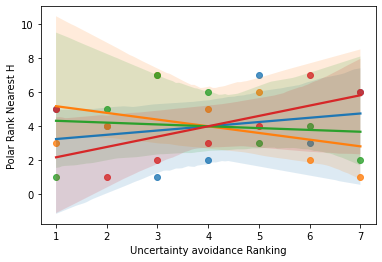

In [52]:
from operator import index
from pandas.core.frame import DataFrame
import plotly.express as px
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

from random import shuffle

import plotly.graph_objs as go

import plotly
import colorlover as cl
import plotly.offline as py
import plotly.graph_objs as go

import seaborn as sns

import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.metrics import mean_absolute_error


def polar_list(list):
  
  right_polar_list = []
  left_polar_list = []
  for i in range(0,len(list)):
    
    left_polar_list.append(list[i][0].replace("-","_"))
    right_polar_list.append(list[i][1].replace("-","_"))

  return left_polar_list,right_polar_list


def alphabetical_list_creation(list):
  new_list = []
  
  for i in range(0,len(list)):
    index_0 = list[i][0].replace("-","_")
    index_1 = list[i][1].replace("-","_")
    
    if index_0 < index_1:
      val = index_0+"-"+index_1
      new_list.append(val)
      
    else:
      val = index_1+"-"+index_0
      new_list.append(val)
      
  return new_list

def company_count(company_df,input_list,polar_embedding):  

  # we then find the number of companies grouped on the basis of location
  for i in input_list:       
    j = i.replace("-","")    
    j = j.replace("_","-")
    
    subset_df2 = polar_embedding[polar_embedding[j] < 0]
    company_inclined_to_left_polar_df1 = subset_df2['Location'].value_counts()
    left_polar = i.split("-")[0]
    
    company_inclined_to_left_polar_df1 = pd.DataFrame({'Country':company_inclined_to_left_polar_df1.index, left_polar :company_inclined_to_left_polar_df1.values})
    company_df=pd.merge(company_df, company_inclined_to_left_polar_df1, how='left',on='Country')    
    company_df[left_polar] = round( company_df[left_polar] / company_df.iloc[:,1] * 100)

    subset_df1 = polar_embedding[polar_embedding[j] > 0]
    company_inclined_to_right_polar_df1 = subset_df1['Location'].value_counts()
    right_polar = i.split("-")[1]
    
    company_inclined_to_right_polar_df1 = pd.DataFrame({'Country':company_inclined_to_right_polar_df1.index, right_polar :company_inclined_to_right_polar_df1.values})
    company_df=pd.merge(company_df, company_inclined_to_right_polar_df1, how='left',on='Country')    
    company_df[right_polar] = round( company_df[right_polar] / company_df.iloc[:,1] * 100)


  company_df = company_df.fillna(0)

  # We are considering only the countries if the numberof companies in the country is over 3
  company_df = company_df[company_df['Total Count'] > 3]

  return company_df


def polar_ranking(polar_list,total_score,ranking,company_df):
  total_sum=0
  total_sum_list=[]
  polar_ranking_list = []
  polar_index=0
  for index,row in company_df.iterrows():  
    
    for i in polar_list:
      
      total_sum = total_sum + (row[i])
    #print(company_df.iloc[index,2:])  
    total_sum_list.append(total_sum/len(polar_list))
    polar_ranking_list.append(index+1)
    total_sum = 0

  company_df[total_score] = total_sum_list
  company_df= company_df.sort_values(by=[total_score],ascending=False)
  company_df[ranking] = polar_ranking_list

  return company_df

def mean_absolute_error_score(merged_df,dimension):
  MAE_of_Score = []
  MAE_of_Score.append(mean_absolute_error(merged_df[dimension], merged_df["Total Score Random"]))
  MAE_of_Score.append(mean_absolute_error(merged_df[dimension], merged_df["Total Score Nearest Random"]))
  MAE_of_Score.append(mean_absolute_error(merged_df[dimension], merged_df["Total Score Human"]))
  MAE_of_Score.append(mean_absolute_error(merged_df[dimension], merged_df["Total Score Nearest Human"]))
  return MAE_of_Score

def mean_absolute_error_rank(merged_df,dimension_ranking):
  MAE = []
  MAE.append(mean_absolute_error(merged_df[dimension_ranking], merged_df["Polar Rank R"]))
  MAE.append(mean_absolute_error(merged_df[dimension_ranking], merged_df["Polar Rank Nearest R"]))
  MAE.append(mean_absolute_error(merged_df[dimension_ranking], merged_df["Polar Rank H"]))
  MAE.append(mean_absolute_error(merged_df[dimension_ranking], merged_df["Polar Rank Nearest H"]))
  return MAE

def correlation_calc(merged_df,dimension_ranking):
  correlation = []
  correlation.append(merged_df["Polar Rank R"].corr(merged_df[dimension_ranking]))
  correlation.append(merged_df["Polar Rank Nearest R"].corr(merged_df[dimension_ranking]))
  correlation.append(merged_df["Polar Rank H"].corr(merged_df[dimension_ranking]))
  correlation.append(merged_df["Polar Rank Nearest H"].corr(merged_df[dimension_ranking]))
  return correlation

# Power Distance
list_powerdistance_random =[('make', 'break'), ('cameraman', 'playwright'), ('mystical', 'factual'), ('promotional', 'defamation'), ('iconic', 'unknown')]
nearest_random_list_powerdistance =[('making', 'breaking'), ('cameramen', 'dramatist'), ('magical', 'inaccuracies'), ('promo', 'libel'), ('recognizable', 'undetermined')]
list_powerdistance =[('hierarchical','non-hierarchical'),('superior','equal'),('leader','subordinate'),('inequality','equality'),('autocrat','democrat')]
nearest_human_list_powerdistance = [('hierarchy', 'consensus-based'), ('inferior', 'equalitys'), ('leaders', 'subordinates'), ('inequalities', 'equals'), ('autocratic', 'senator')]

# Individualism
list_individualism_random = [('lop', 'secure'), ('shah', 'poor'), ('pneumatic', 'solid'), ('interpret', 'misinterpret'), ('confer', 'refuse')]
nearest_random_list_individualism= [('buri', 'securing'), ('ahmad', 'poorer'), ('hydraulic', 'consistent'), ('interpreting', 'misunderstand'), ('conferring', 'refusing')]
list_individualism = [('individuality','community'),('self-interest','harmony'),('tasks','relationships'),('individual','groups'),('universalism','particularism')]
nearest_human_list_individualism = [('originality', 'communities'), ('selfishness', 'harmonious'), ('task', 'relationship'), ('individuals', 'group'), ('mangxamba', 'unitarianism')]

# Masculinity
list_masculinity_random = [('try', 'abstain'), ('fatalistic', 'freewill'), ('knowledgeable', 'uninformed'), ('confine', 'free'), ('fan', 'warm')]
nearest_random_list_masculinity = [('trying', 'abstaining'), ('nonchalant', 'gmv'), ('knowledgable', 'misinformed'), ('confining', 'freedom'), ('fans', 'cool')]
list_masculinity = [('achievement', 'support'),('competitive', 'caring'),('assertive', 'submissive'),('ambitious', 'unambitious'),('sucess','cooperation')]
nearest_human_list_masculinity = [('achievements', 'supported'), ('competition', 'loving'), ('forceful', 'subservient'), ('undertaking', 'unathletic'), ('ufauthor', 'bilateral')]

# long term Orientation
list_longterm_random = [('innovator', 'follower'), ('sensory', 'numb'), ('hedge', 'squander'), ('arachnid', 'serpent'), ('disclose', 'secrete')]
nearest_random_list_longterm = [('visionary', 'disciple'), ('auditory', 'numbed'), ('fund', 'squandering'), ('itsy', 'serpents'), ('disclosing', 'secreted')]
list_longterm = [('pragmatic','normative'),('progress','preserve'),('adapt','conserve'),('developing','stable'),('advance','retain')]
nearest_human_list_longterm = [('pragmatism', 'conceptions'), ('efforts', 'preserving'), ('adapting', 'conserving'), ('develop', 'stability'), ('advancing', 'retained')]

# Indulgence
list_indulgence_random = [('diagnose', 'sicken'), ('intercourse', 'disconnection'), ('sensory', 'sensorial'), ('emasculate', 'strengthen'), ('metropolitan', 'rural')]
nearest_random_list_indulgence = [('diagnosing', 'sickens'), ('sexual', 'disconnect'), ('auditory', 'skorokhod'), ('disempower', 'strengthening'), ('metro', 'urban')]
list_indulgence = [('fulfillment','restriction'),('satisfaction','limitation'),('liberty','moderation'),('expand','direct'),('freedom','regulation')]
nearest_human_list_indulgence = [('fulfilment', 'restrictions'), ('satisfied', 'limitations'), ('fredom', 'restraint'), ('expanding', 'indirect'), ('freedoms', 'regulations')]

# Unceratinity Avoidance
list_uncertainity_avoidance_random = [('stretcher', 'compressor'), ('amalgamate', 'separate'), ('caretaker', 'assailant'), ('taker', 'violator'), ('contaminate', 'sterilize')]
nearest_random_list_uncertainity_avoidance = [('stretchers', 'compressors'), ('amalgamating', 'separately'), ('interim', 'assailants'), ('takers', 'violators'), ('contaminating', 'sterilized')]
list_uncertainity_avoidance = [('clarity','complexity'),('clear','ambiguous'),('certain','uncertain'),('uniformity','diversity'),('agreement','variation')]
nearest_human_list_uncertainity_avoidance = [('simplicity', 'complexities'), ('yet', 'vague'), ('particular', 'unclear'), ('homogeneity', 'diverse'), ('agreements', 'variations')]


print("Please choose any of the Hofstede dimension")
print("1. Power Distance")
print("2. Individualism vs Collectivism")
print("3. Masculinity vs Femininity")
print("4. Long Term vs Short Term Orientation")
print("5. Indulgence vs Restraint")
print("6. Uncertainty Avoidance\n")

Hofstede_dimensions = input("Enter the Hofstede Dimension: ")


# ('Power Distance', 'Individualism vs Collectivism','Masculinity vs Femininity',
#Long Term vs Short Term Orientation','Indulgence vs Restraint','Uncertainty Avoidance')) 
#Hofstede_dimensions = "Individualism vs Collectivism"

new_df = pd.read_csv('/content/drive/MyDrive/Polar Embedding/120 dimension polar embedding.csv')
fortune_500_company = pd.read_csv('/content/drive/MyDrive/Fortune Global 500 companies.csv',encoding= 'unicode_escape')
fortune_500_company['Company'] = fortune_500_company['Company'].str.lower()
fortune_500_company['Company'] = fortune_500_company['Company'].str.replace(" ", "")

polar_embedding = pd.merge(fortune_500_company, new_df, how="right", left_on="Company", right_on="Unnamed: 0")

polar_embedding = polar_embedding.drop(['Rank'], axis=1)  # This will drop the column Rank
polar_embedding = polar_embedding.drop(['Unnamed: 0'], axis=1)  # This will drop the column Rank

# This will find the total number of companies in our data frame based on Location
total_company_list_based_on_loc = polar_embedding['Location'].value_counts()
total_company_count_df = pd.DataFrame({'Country': total_company_list_based_on_loc.index, 'Total Count': total_company_list_based_on_loc.values})

hofstede_df = pd.read_csv("/content/drive/MyDrive/Polar Embedding/Hofstede 6 dimensions.csv",sep=";")
hofstede_df=hofstede_df[hofstede_df.iloc[:,:]!="#NULL!" ]

    
dim_index = ""
dimension_ranking = ""

if (Hofstede_dimensions == 'Power Distance'):
  dim_index="Power distance index"
  dimension_ranking="Power distance Ranking"
  
  left_polar_list_random,right_polar_list_random = polar_list(list_powerdistance_random)
  left_polar_list_nearest_random,right_polar_list_nearest_random = polar_list(nearest_random_list_powerdistance)
  left_polar_list_human,right_polar_list_human = polar_list(list_powerdistance)
  left_polar_list_nearest_human,right_polar_list_nearest_human = polar_list(nearest_human_list_powerdistance)


  input_list_random = alphabetical_list_creation(list_powerdistance_random)
  input_list_nearest_random = alphabetical_list_creation(nearest_random_list_powerdistance)
  input_list_human = alphabetical_list_creation(list_powerdistance)
  input_list_nearest_human = alphabetical_list_creation(nearest_human_list_powerdistance)

elif (Hofstede_dimensions == 'Individualism vs Collectivism'):
  dim_index="Individualism index"
  dimension_ranking="Individualism Ranking"
    

  left_polar_list_random,right_polar_list_random = polar_list(list_individualism_random)
  left_polar_list_nearest_random,right_polar_list_nearest_random = polar_list(nearest_random_list_individualism)
  left_polar_list_human,right_polar_list_human = polar_list(list_individualism)
  left_polar_list_nearest_human,right_polar_list_nearest_human = polar_list(nearest_human_list_individualism)


  input_list_random = alphabetical_list_creation(list_individualism_random)
  input_list_nearest_random = alphabetical_list_creation(nearest_random_list_individualism)
  input_list_human = alphabetical_list_creation(list_individualism)
  input_list_nearest_human = alphabetical_list_creation(nearest_human_list_individualism)

elif (Hofstede_dimensions == 'Masculinity vs Femininity'):
  dim_index="Masculinity index"
  dimension_ranking="Masculinity Ranking"

  
  left_polar_list_random,right_polar_list_random = polar_list(list_masculinity_random)
  left_polar_list_nearest_random,right_polar_list_nearest_random = polar_list(nearest_random_list_masculinity)
  left_polar_list_human,right_polar_list_human = polar_list(list_masculinity)
  left_polar_list_nearest_human,right_polar_list_nearest_human = polar_list(nearest_human_list_masculinity)


  input_list_random = alphabetical_list_creation(list_masculinity_random)
  input_list_nearest_random = alphabetical_list_creation(nearest_random_list_masculinity)
  input_list_human = alphabetical_list_creation(list_masculinity)
  input_list_nearest_human = alphabetical_list_creation(nearest_human_list_masculinity)
    

elif (Hofstede_dimensions == 'Long Term vs Short Term Orientation'):
  dim_index="Long term orientation index"
  dimension_ranking="Long term orientation Ranking"

  
  left_polar_list_random,right_polar_list_random = polar_list(list_longterm_random)
  left_polar_list_nearest_random,right_polar_list_nearest_random = polar_list(nearest_random_list_longterm)
  left_polar_list_human,right_polar_list_human = polar_list(list_longterm)
  left_polar_list_nearest_human,right_polar_list_nearest_human = polar_list(nearest_human_list_longterm)


  input_list_random = alphabetical_list_creation(list_longterm_random)
  input_list_nearest_random = alphabetical_list_creation(nearest_random_list_longterm)
  input_list_human = alphabetical_list_creation(list_longterm)
  input_list_nearest_human = alphabetical_list_creation(nearest_human_list_longterm)
    

elif (Hofstede_dimensions == 'Indulgence vs Restraint'):
  dim_index="Indulgence index"
  dimension_ranking="Indulgence Ranking"

  
  left_polar_list_random,right_polar_list_random = polar_list(list_indulgence_random)
  left_polar_list_nearest_random,right_polar_list_nearest_random = polar_list(nearest_random_list_indulgence)
  left_polar_list_human,right_polar_list_human = polar_list(list_indulgence)
  left_polar_list_nearest_human,right_polar_list_nearest_human = polar_list(nearest_human_list_indulgence)


  input_list_random = alphabetical_list_creation(list_indulgence_random)
  input_list_nearest_random = alphabetical_list_creation(nearest_random_list_indulgence)
  input_list_human = alphabetical_list_creation(list_indulgence)
  input_list_nearest_human = alphabetical_list_creation(nearest_human_list_indulgence)
    

elif (Hofstede_dimensions == 'Uncertainty Avoidance'):
  dim_index="Uncertainty avoidance index"
  dimension_ranking="Uncertainty avoidance Ranking"

  
  left_polar_list_random,right_polar_list_random = polar_list(list_uncertainity_avoidance_random)
  left_polar_list_nearest_random,right_polar_list_nearest_random = polar_list(nearest_random_list_uncertainity_avoidance)
  left_polar_list_human,right_polar_list_human = polar_list(list_uncertainity_avoidance)
  left_polar_list_nearest_human,right_polar_list_nearest_human = polar_list(nearest_human_list_uncertainity_avoidance)


  input_list_random = alphabetical_list_creation(list_uncertainity_avoidance_random)
  input_list_nearest_random = alphabetical_list_creation(nearest_random_list_uncertainity_avoidance)
  input_list_human = alphabetical_list_creation(list_uncertainity_avoidance)
  input_list_nearest_human = alphabetical_list_creation(nearest_human_list_uncertainity_avoidance)
    

company_df = total_company_count_df.copy()  # This make a copy of data frame

#Below lines will find the number of companies aligned to the respective left word in antonym pair
company_df = company_count(company_df,input_list_random,polar_embedding)
company_df = company_count(company_df,input_list_nearest_random,polar_embedding)
company_df = company_count(company_df,input_list_human,polar_embedding)
company_df = company_count(company_df,input_list_nearest_human,polar_embedding)


#Below lines will find the total score based on the left word and final give a ranking
company_df = polar_ranking(left_polar_list_random,"Total Score Random","Polar Rank R",company_df)
company_df = polar_ranking(left_polar_list_nearest_random,"Total Score Nearest Random","Polar Rank Nearest R",company_df)
company_df = polar_ranking(left_polar_list_human,"Total Score Human","Polar Rank H",company_df)
company_df = polar_ranking(left_polar_list_nearest_human,"Total Score Nearest Human","Polar Rank Nearest H",company_df)

length = len(left_polar_list_random) + len(left_polar_list_nearest_random) + len(left_polar_list_human) + len(left_polar_list_nearest_human)
company_df.drop(company_df.iloc[:, 2:2 + (length) * 2], axis=1, inplace=True)

hofstede_df = hofstede_df[hofstede_df.iloc[:, :] != "#NULL!"]
hofstede_df.dropna(axis=0)

# This merge the company dataframe and Hofstede dataframe over the common column Country
merged_df = pd.merge(company_df, hofstede_df, how='left', on='Country')

ranking_list = []
for i in range(1, len(merged_df[dim_index]) + 1):
    ranking_list.append(i)
merged_df = merged_df.sort_values(by=[dim_index], ascending=False)
merged_df[dimension_ranking] = ranking_list

# Below are the correlation plot 
sns.regplot(x=merged_df[dimension_ranking], y=merged_df["Polar Rank R"])
sns.regplot(x=merged_df[dimension_ranking], y=merged_df["Polar Rank Nearest R"])
sns.regplot(x=merged_df[dimension_ranking], y=merged_df["Polar Rank H"])
sns.regplot(x=merged_df[dimension_ranking], y=merged_df["Polar Rank Nearest H"])



# Below is the Hofstede dimension score and our score we got for each of the 4 list

fig = go.Figure()
fig = make_subplots(rows=2, cols=2)



fig.add_trace(go.Bar(x=merged_df["Country"] , y=merged_df[dim_index].astype(int), name = dim_index),1,1)  
fig.add_trace(go.Bar(x=merged_df["Country"] , y=merged_df["Total Score Random"].astype(int), name = "Random Polar Score"),1,1)  

fig.add_trace(go.Bar(x=merged_df["Country"] , y=merged_df[dim_index].astype(int), name = dim_index),1,2)  
fig.add_trace(go.Bar(x=merged_df["Country"] , y=merged_df["Total Score Nearest Random"].astype(int), name = "Nearest Random Polar Score"),1,2)  

fig.add_trace(go.Bar(x=merged_df["Country"] , y=merged_df[dim_index].astype(int), name = dim_index),2,1)  
fig.add_trace(go.Bar(x=merged_df["Country"] , y=merged_df["Total Score Human"].astype(int), name = "Human Polar Score"),2,1)  

fig.add_trace(go.Bar(x=merged_df["Country"] , y=merged_df[dim_index].astype(int), name = dim_index),2,2)  
fig.add_trace(go.Bar(x=merged_df["Country"] , y=merged_df["Total Score Nearest Human"].astype(int), name = "Nearest Human Polar Score"),2,2) 

fig.show() 

MAE = mean_absolute_error_rank(merged_df,dimension_ranking)
MAE_of_Score = mean_absolute_error_rank(merged_df,dimension_ranking)
correlation = correlation_calc(merged_df,dimension_ranking)


# The below code creates a data frame with the results
eval_data = {"Mean Absolute Error of Rank" : MAE,
              "Correlation" : correlation,
            "Mean Absolute Error of Score" : MAE_of_Score
            }

eval_df = pd.DataFrame(eval_data, index =["Random List", "Nearest Random List","Human Made List","Nearest to Human Made List"])
display(eval_df)

corr = merged_df.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1).highlight_null(null_color='#f1f1f1').set_precision(2)




In [53]:
avgrank_random_list.append(eval_df.iloc[0,0])
avgrank_nearest_random_list.append(eval_df.iloc[1,0])
avgrank_human_list.append(eval_df.iloc[2,0])
avgrank_nearest_human_list.append(eval_df.iloc[3,0])

avgscore_random_list.append(eval_df.iloc[0,2])
avgscore_nearest_random_list.append(eval_df.iloc[1,2])
avgscore_human_list.append(eval_df.iloc[2,2])
avgscore_nearest_human_list.append(eval_df.iloc[3,2])



In [54]:
if len(avgrank_random_list) == 6:
  print("Random list - Average Mean Absolute Error of Rank: ", list_avg(avgrank_random_list))
  print("Nearest Random list - Average Mean Absolute Error of Rank: ", list_avg(avgrank_nearest_random_list))
  print("Human Made list - Average Mean Absolute Error of Rank: ", list_avg(avgrank_human_list))
  print("Nearest Human Made list - Average Mean Absolute Error of Rank: ", list_avg(avgrank_nearest_human_list))

  print("----------------------------------------------------------------------------------------------------------")

  print("Random list - Average Mean Absolute Error of Score: ", list_avg(avgrank_random_list))
  print("Nearest Random list - Average Mean Absolute Error of Score: ", list_avg(avgrank_nearest_random_list))
  print("Human Made list - Average Mean Absolute Error of Score: ", list_avg(avgrank_human_list))
  print("Nearest Human Made list - Average Mean Absolute Error of Score: ", list_avg(avgrank_nearest_human_list))



Random list - Average Mean Absolute Error of Rank:  2.2380952380952377
Nearest Random list - Average Mean Absolute Error of Rank:  2.1904761904761907
Human Made list - Average Mean Absolute Error of Rank:  2.523809523809524
Nearest Human Made list - Average Mean Absolute Error of Rank:  2.0
----------------------------------------------------------------------------------------------------------
Random list - Average Mean Absolute Error of Score:  2.2380952380952377
Nearest Random list - Average Mean Absolute Error of Score:  2.1904761904761907
Human Made list - Average Mean Absolute Error of Score:  2.523809523809524
Nearest Human Made list - Average Mean Absolute Error of Score:  2.0
